# Initialize Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('../CoStar LA Multifamily For Taylor Cleaned (1).csv')


FileNotFoundError: [Errno 2] No such file or directory: '../CoStar LA Multifamily For Taylor Cleaned (1).csv'

In [ ]:
df.head()
df.info()
df.describe()


NameError: name 'df' is not defined

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
# Remove commas and convert "Last Sale Price" to Numeric
df['Last Sale Price'] = pd.to_numeric(df['Last Sale Price'].str.replace(',', ''), errors='coerce')

# Drop Rows with Missing "Last Sale Price"
df.dropna(subset=['Last Sale Price'], inplace=True)

# Feature Selection
cols_to_keep = ['Number Of Units', 'Star Rating', 'Building Class', 'Market Name',
                'Vacancy %', 'Year Built', 'Number Of Stories', 'Land Area (AC)',
                'Latitude', 'Longitude', 'RBA', 'Taxes Total', 'Last Sale Price']

# Create a deep copy to avoid SettingWithCopyWarning
df = df[cols_to_keep].copy()

# Check if DataFrame is empty
if df.empty:
  print("DataFrame is empty after slicing. Check your columns.")
else:
  # Fill numerical columns with median
  for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

  # Fill categorical columns with mode
  for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

  # Encode categorical variables
  df = pd.get_dummies(df, columns=['Star Rating', 'Building Class', 'Market Name'], drop_first=True)

  # Check correlation with "Last Sale Price"
  correlations = df.corr()['Last Sale Price'].sort_values()
  print(correlations)


Star Rating_2.0     -0.297805
Building Class_C    -0.294930
Longitude           -0.028495
Building Class_F     0.001470
Latitude             0.009319
Vacancy %            0.063893
Star Rating_3.0      0.110946
Building Class_B     0.134169
Land Area (AC)       0.227175
Year Built           0.250858
Star Rating_5.0      0.296505
Taxes Total          0.302387
Number Of Stories    0.402373
Star Rating_4.0      0.452755
Number Of Units      0.578430
RBA                  0.613548
Last Sale Price      1.000000
Name: Last Sale Price, dtype: float64


# Graphing Row Specs

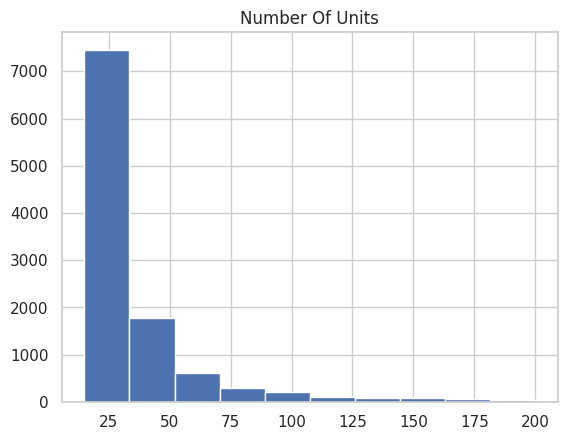

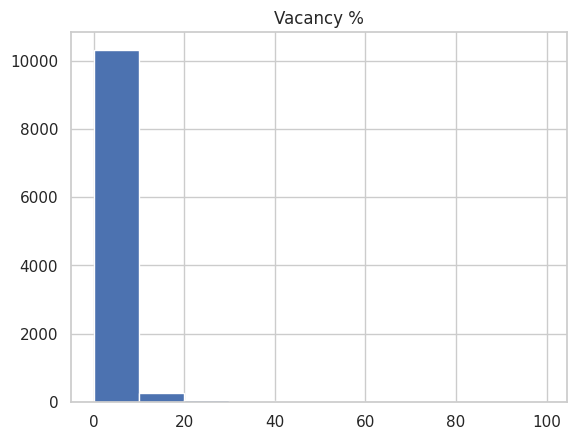

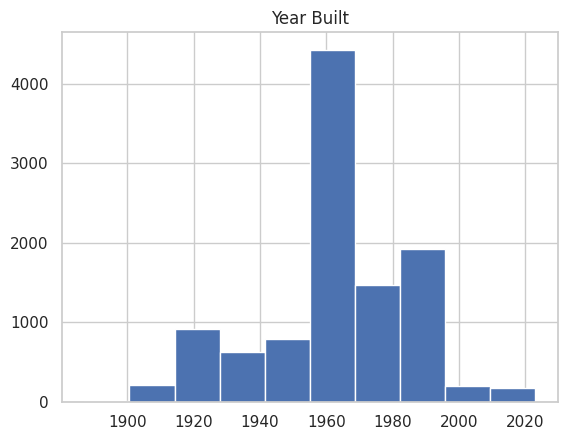

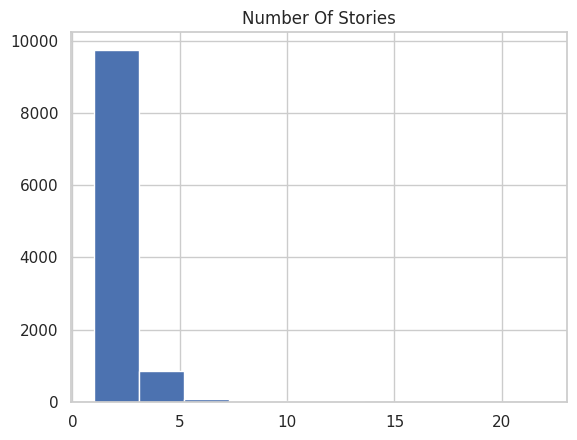

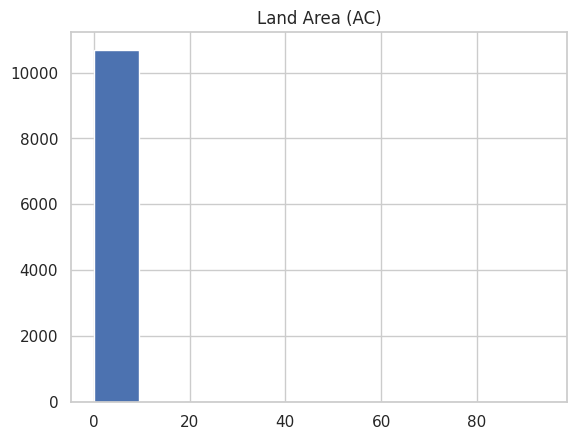

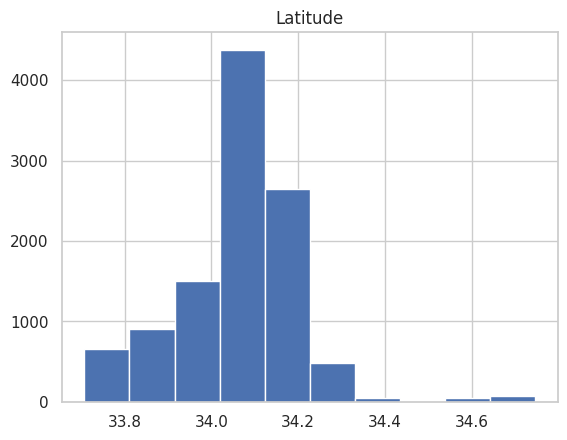

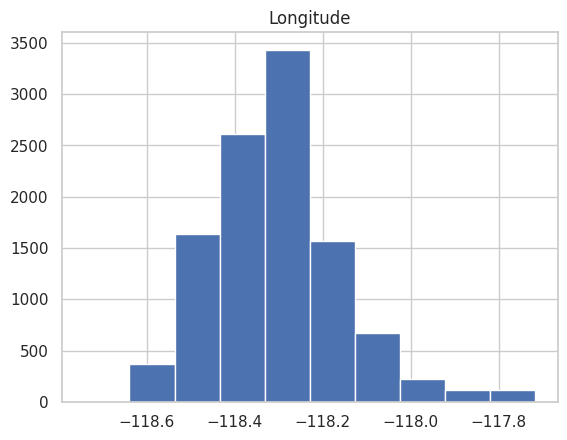

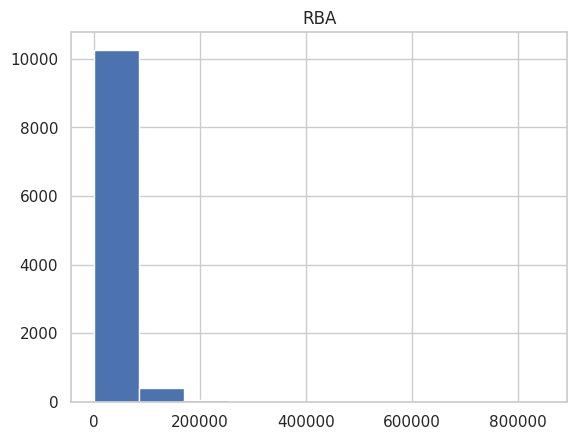

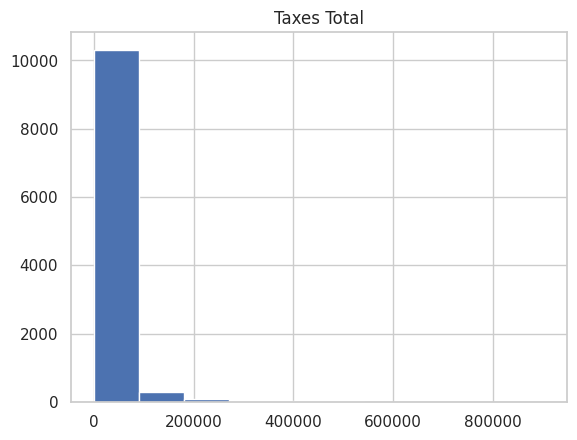

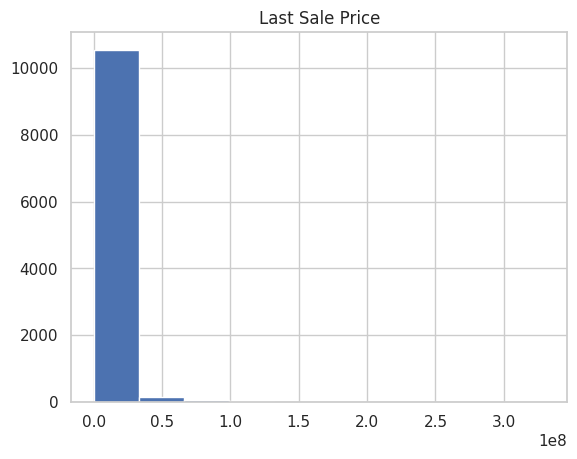

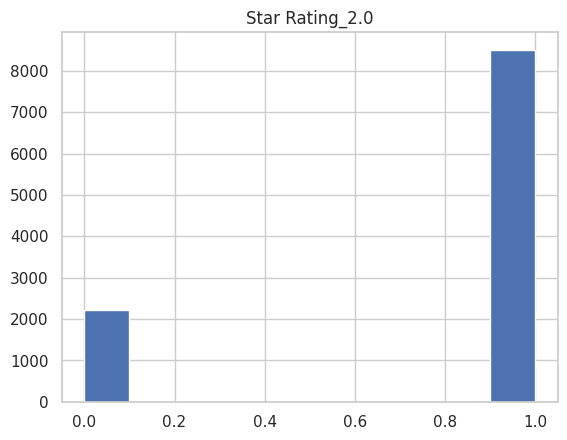

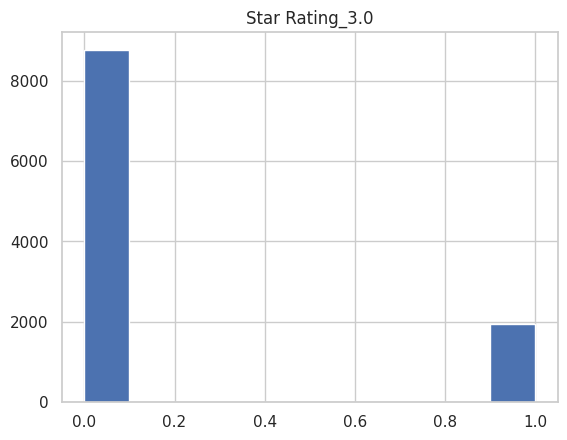

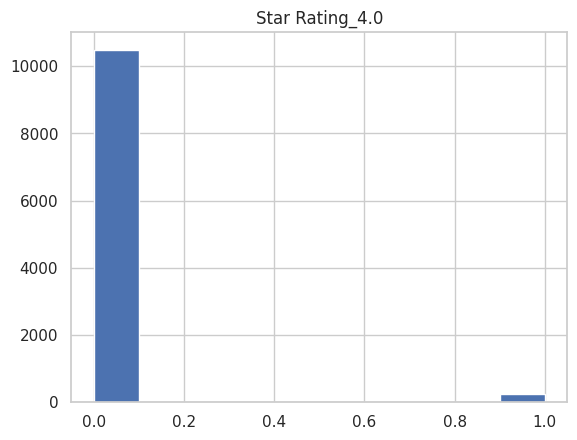

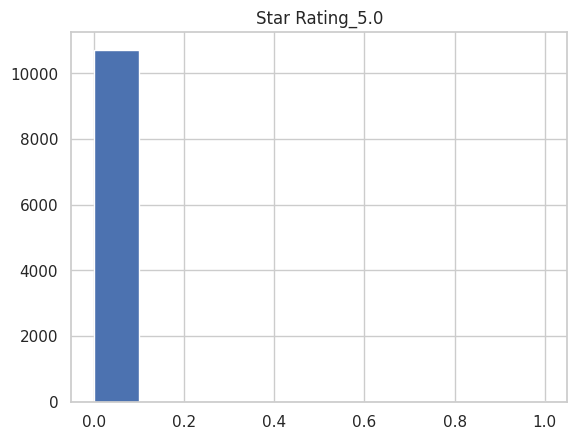

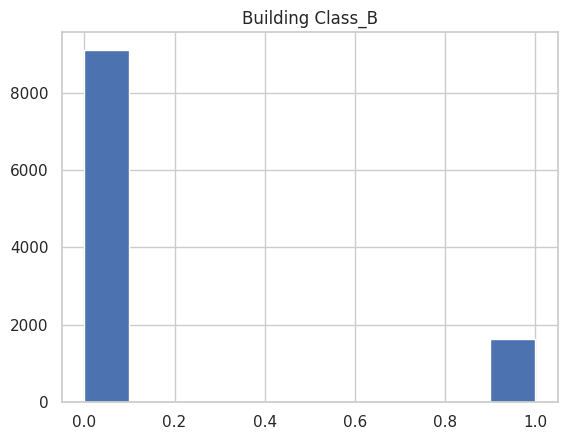

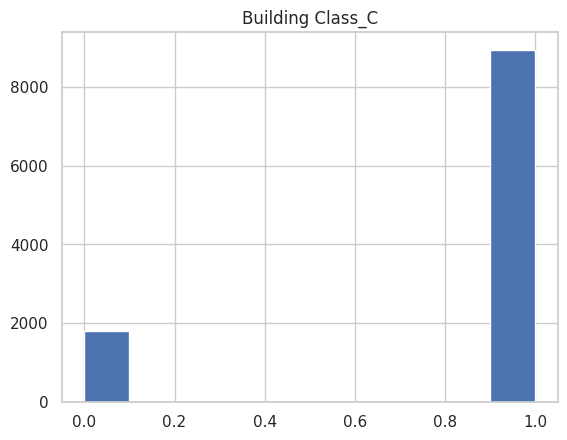

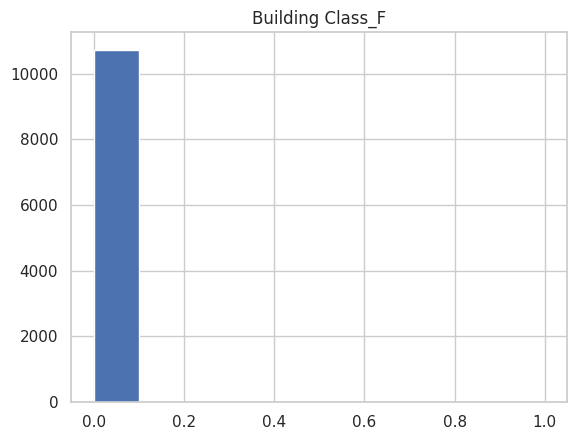

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
  plt.hist(df[col])
  plt.title(col)
  plt.show()


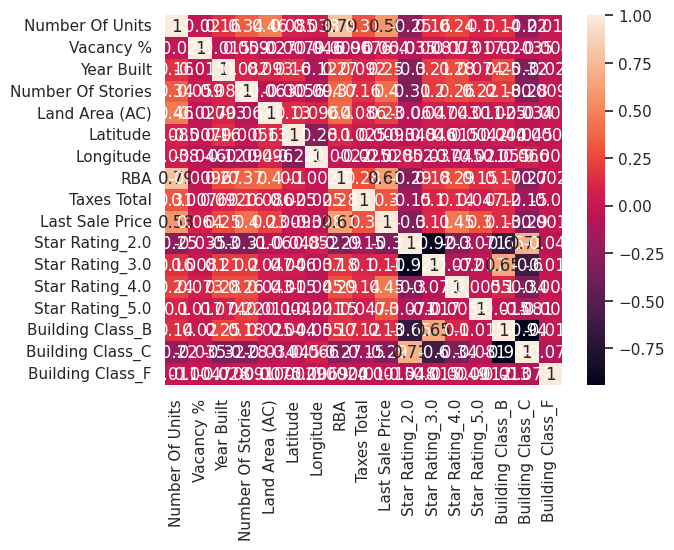

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


# Graphing Last Sale Price Correlations

In [ ]:
# Example using Z-Score
from scipy import stats
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]


In [ ]:
df['Last Sale Price'] = pd.to_numeric(df['Last Sale Price'], errors='coerce')


In [ ]:
df.dropna(subset=['Last Sale Price'], inplace=True)


In [ ]:
plt.hist(df['Last Sale Price'])
plt.title('Distribution of Last Sale Price')
plt.xlabel('Last Sale Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlations = df[numeric_columns].corr()['Last Sale Price'].sort_values()
print(correlations)


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
  sns.boxplot(x=col, y='Last Sale Price', data=df)
  plt.title(f'{col} vs Last Sale Price')
  plt.xticks(rotation=90)
  plt.show()


# More EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if DataFrame is empty
if df.empty:
  print("DataFrame is empty. EDA cannot be performed.")
else:
  # Set style for Seaborn
  sns.set(style="whitegrid")

  # 1. Summary statistics for numerical features
  print("Summary Statistics:")
  print(df.describe())

  # 2. Check for missing values
  print("\nMissing Values:")
  print(df.isnull().sum())

  # 3. Distribution of 'Last Sale Price'
  plt.figure(figsize=(12, 6))
  sns.histplot(df['Last Sale Price'], bins=30, kde=True)
  plt.title('Distribution of Last Sale Price')
  plt.xlabel('Last Sale Price')
  plt.ylabel('Frequency')
  plt.show()

  # 4. Correlation heatmap for numerical features
  plt.figure(figsize=(14, 10))
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Heatmap')
  plt.show()

  # Add more plots and analyses as needed.